In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import sys
#visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
# consistent plots #
from pylab import rcParams
rcParams['figure.figsize']= 12,5
rcParams['xtick.labelsize']= 12
rcParams['ytick.labelsize']= 12
rcParams['axes.labelsize']= 12
#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

In [38]:
b = np.load('ihdp.npz')
print(b.files)

['x', 't', 'yf', 'ycf', 'ite']


In [39]:
print(b['x'])

[[ 1.39739503  0.99634625 -1.10562395 ...  0.          0.
   1.        ]
 [ 0.26903265  0.19681812  0.38382797 ...  0.          0.
   0.        ]
 [ 1.05153683  1.79587438 -1.10562395 ...  0.          0.
   1.        ]
 ...
 [-1.04522851 -1.33727611  1.12855393 ...  0.          0.
   0.        ]
 [-0.11573459 -0.60271001 -1.10562395 ...  1.          0.
   0.        ]
 [ 1.41901117  1.39611031 -0.73326097 ...  0.          0.
   1.        ]]


In [40]:
print(b['t'])

[[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.

In [41]:
print(b['yf'])

[[ 4.77123234]
 [ 2.95627286]
 [ 4.16416445]
 [ 6.17230732]
 [ 7.83446893]
 [ 0.75373794]
 [ 6.20815481]
 [ 7.63018615]
 [ 3.25830846]
 [ 0.3112368 ]
 [ 2.09713577]
 [ 3.18211401]
 [ 2.57310118]
 [ 3.33876946]
 [ 0.30308842]
 [-0.04373024]
 [ 1.59334394]
 [ 7.25338242]
 [ 7.89522425]
 [ 1.2676669 ]
 [ 1.8812178 ]
 [ 0.87964609]
 [ 3.8781258 ]
 [ 1.09534787]
 [ 3.19711381]
 [ 2.95051554]
 [ 2.25089199]
 [ 2.04408232]
 [ 6.33059402]
 [ 1.62211406]
 [ 7.39195353]
 [ 6.42053812]
 [ 8.02530569]
 [ 3.43286109]
 [ 7.7475864 ]
 [ 2.72506258]
 [ 1.56848332]
 [ 1.93098695]
 [ 2.47727284]
 [ 5.47158732]
 [ 2.58075714]
 [ 4.01208879]
 [ 2.57374478]
 [ 7.84051114]
 [ 0.34662037]
 [ 1.79799718]
 [ 1.44741284]
 [ 6.4682744 ]
 [ 7.34264058]
 [ 3.0491306 ]
 [ 1.48851289]
 [ 0.6139239 ]
 [ 1.28359341]
 [ 5.9357357 ]
 [ 0.94823953]
 [ 2.60232276]
 [ 3.98211061]
 [ 3.14423741]
 [11.26822777]
 [ 1.92607542]
 [ 4.31701641]
 [ 7.04518582]
 [ 7.41470256]
 [ 2.70681993]
 [ 6.29186737]
 [ 1.74476715]
 [ 1.97337

In [42]:
print(b['ycf'])

[[-0.29850891]
 [ 5.78376968]
 [ 7.05578856]
 [ 1.37969725]
 [ 2.74798597]
 [ 5.87645084]
 [10.17100383]
 [ 2.4824422 ]
 [ 6.17953397]
 [ 6.55079117]
 [ 6.54762283]
 [ 5.34247061]
 [ 6.32000832]
 [ 8.98447574]
 [ 4.73610952]
 [ 3.72091201]
 [ 5.24303327]
 [ 4.0281559 ]
 [ 3.23080297]
 [ 5.18431252]
 [ 5.55268365]
 [ 5.697233  ]
 [ 6.33874348]
 [ 7.28534557]
 [ 7.26687067]
 [ 8.3535074 ]
 [ 4.14411323]
 [ 5.09213536]
 [ 7.85150227]
 [ 6.94879203]
 [ 2.27954043]
 [ 6.53159449]
 [ 5.05809156]
 [ 7.77211532]
 [ 2.85606756]
 [ 5.82041423]
 [ 6.38366685]
 [ 5.64603514]
 [ 6.72719683]
 [ 2.25760007]
 [ 7.8964563 ]
 [ 6.4531784 ]
 [ 5.1461305 ]
 [ 3.85624295]
 [ 6.73353944]
 [ 5.95757389]
 [ 8.4951912 ]
 [ 1.62570359]
 [ 1.71316262]
 [ 6.85633198]
 [ 5.33171061]
 [ 6.03621089]
 [ 4.05770561]
 [ 1.51711331]
 [ 5.76082479]
 [ 5.29214798]
 [ 8.39277153]
 [ 5.89174731]
 [ 9.80516356]
 [ 7.48369667]
 [ 5.84907321]
 [ 8.24387104]
 [ 1.48119157]
 [ 8.89051077]
 [ 2.12824243]
 [ 6.93143865]
 [ 6.40671

In [43]:
print(b['ite'])

[[ 4.65792818]
 [ 3.42860435]
 [ 3.65819485]
 [ 4.58550545]
 [ 4.26559119]
 [ 4.66267948]
 [ 1.00998701]
 [ 4.4045165 ]
 [ 4.54798163]
 [ 4.56663652]
 [ 4.66719402]
 [ 3.32833801]
 [ 4.07384329]
 [ 2.2668913 ]
 [ 4.56945397]
 [ 4.43435033]
 [ 4.61347703]
 [ 4.0342432 ]
 [ 2.75682759]
 [ 4.03823606]
 [ 4.66267948]
 [ 3.96040599]
 [ 3.92780623]
 [ 4.45778361]
 [ 3.73792643]
 [ 4.26066812]
 [ 4.56945397]
 [ 4.46107484]
 [-0.10731801]
 [ 4.43435033]
 [ 3.85926731]
 [ 3.34995517]
 [ 3.17669923]
 [ 3.34995517]
 [ 4.3044335 ]
 [ 4.6505667 ]
 [ 4.22425666]
 [ 4.45007897]
 [ 3.42230673]
 [ 4.64438722]
 [ 4.18203264]
 [ 3.92780623]
 [ 3.92780623]
 [ 3.73792643]
 [ 4.66635481]
 [ 4.63384046]
 [ 4.56945397]
 [ 3.49789301]
 [ 4.17648947]
 [ 3.2339431 ]
 [ 4.61191353]
 [ 4.33520458]
 [ 4.66624008]
 [ 4.55108091]
 [ 4.54798163]
 [ 4.48285222]
 [ 3.2556775 ]
 [ 4.66719402]
 [-1.8669886 ]
 [ 4.13734103]
 [ 3.40152508]
 [ 1.49132831]
 [ 4.3044335 ]
 [ 3.66981629]
 [ 4.13734103]
 [ 4.42972789]
 [ 4.65771

In [44]:
c = np.load('jobs.npz')
print(c.files)

['x', 't', 'y', 'e']


In [45]:
print(c['x'])

[[-0.61428209  1.46472657  0.         ...  0.          2.84390896
   0.        ]
 [-0.80246274  0.10183499  0.         ...  0.          0.03842226
   0.        ]
 [-0.89655306 -0.23888791  1.         ...  0.         -0.19130379
   0.        ]
 ...
 [-0.80246274  0.44255788  1.         ...  0.          0.13597047
   0.        ]
 [ 0.70298243  0.10183499  0.         ...  0.          0.22571483
   0.        ]
 [ 1.45570502  0.10183499  0.         ...  1.         -0.97998113
   0.        ]]


In [46]:
print(c['t'])

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [47]:
print(c['y'])

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [48]:
print(c['e'])

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [49]:
sorted(c.files)

['e', 't', 'x', 'y']

In [50]:
sorted(b.files)

['ite', 't', 'x', 'ycf', 'yf']

In [51]:
type(b['x']),type(b['t'])

(numpy.ndarray, numpy.ndarray)

In [52]:
b['x'].shape, b['t'].shape

((747, 25), (747, 1))

In [53]:
trainX = b['x']
testX = b['t']

In [54]:
trainX.shape, testX.shape

((747, 25), (747, 1))

In [55]:
input_size=2
output_size=1
models = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
                            ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
models.fit(b['x'],b['t'],epochs=100,verbose=1)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4232
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2766
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2360
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2099
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1920
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1808
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1711
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1648
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1600
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1567
Epoch 11/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1539
Epoch 12/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1516
Epoch 13/100
24/24 [=================

In [56]:
models.layers[0].get_weights()

[array([[ 0.05798026],
        [ 0.0092624 ],
        [ 0.04310816],
        [-0.00922621],
        [-0.02050406],
        [ 0.02301894],
        [ 0.03136053],
        [ 0.00788941],
        [ 0.05706829],
        [-0.01030486],
        [-0.03554136],
        [-0.06826544],
        [ 0.05249991],
        [ 0.06527087],
        [-0.02410634],
        [-0.04708868],
        [ 0.03093399],
        [ 0.12337353],
        [-0.05337735],
        [-0.16176268],
        [-0.09135458],
        [-0.11391863],
        [-0.17692737],
        [-0.12255073],
        [ 0.03855824]], dtype=float32), array([0.12508437], dtype=float32)]

In [57]:
weights=models.layers[0].get_weights()[0]
bias=models.layers[0].get_weights()[1]

In [58]:
out=b['t'].round(1)
from sklearn.metrics import mean_squared_error
mean_squared_error(b['ite'], out, squared=False)

3.9451751053236737

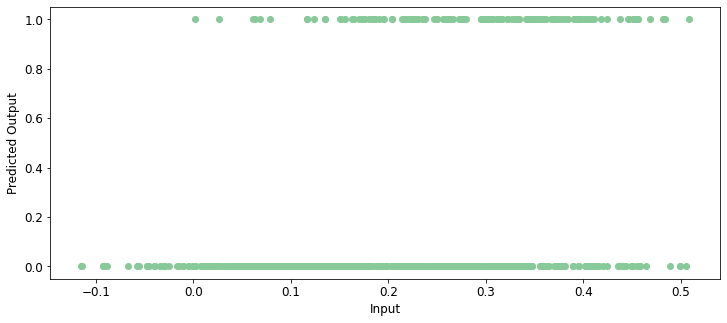

In [59]:
plt.scatter(np.squeeze(models.predict_on_batch(b['x'])),np.squeeze(b['t']),c='#88c999')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.show()

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVR

In [61]:
estimator=SVR(kernel='rbf')

In [62]:
X = b['x']

y = b['t']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [64]:
rfc = RandomForestClassifier()

In [65]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [66]:
print(clf.best_params_)

{'max_depth': 10, 'max_features': 2}


Feature: 0, Score: 0.40121
Feature: 1, Score: 0.12356
Feature: 2, Score: 0.26305
Feature: 3, Score: -0.17487
Feature: 4, Score: -0.10906
Feature: 5, Score: 0.16493
Feature: 6, Score: 0.19748
Feature: 7, Score: 0.03102
Feature: 8, Score: 0.38843
Feature: 9, Score: -0.03923
Feature: 10, Score: -0.18814
Feature: 11, Score: -0.35413
Feature: 12, Score: 0.30624
Feature: 13, Score: 0.30847
Feature: 14, Score: -0.18154
Feature: 15, Score: -0.54954
Feature: 16, Score: 0.14428
Feature: 17, Score: 0.60710
Feature: 18, Score: -0.25279
Feature: 19, Score: -1.07128
Feature: 20, Score: -0.48966
Feature: 21, Score: -0.77668
Feature: 22, Score: -1.43665
Feature: 23, Score: -0.90216
Feature: 24, Score: 0.16709


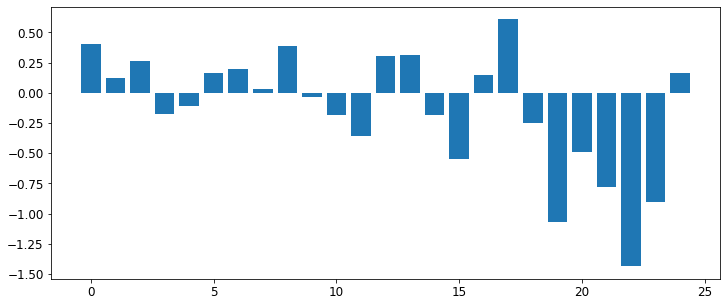

In [67]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
model = LogisticRegression()
model.fit(X, y)
importance = model.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [68]:
X = c['x']

y = c['t']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Feature: 0, Score: 0.56470
Feature: 1, Score: 0.60635
Feature: 2, Score: 1.09297
Feature: 3, Score: 1.23719
Feature: 4, Score: -1.13914
Feature: 5, Score: -0.04036
Feature: 6, Score: -0.10980
Feature: 7, Score: -1.22947
Feature: 8, Score: -0.29153
Feature: 9, Score: -0.91429
Feature: 10, Score: -0.80836
Feature: 11, Score: 0.34698
Feature: 12, Score: -0.04351
Feature: 13, Score: 0.57237
Feature: 14, Score: -0.70881
Feature: 15, Score: -0.60945
Feature: 16, Score: -0.83462


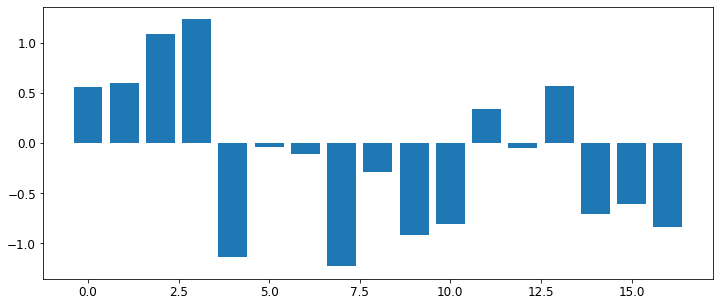

In [70]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
model = LogisticRegression()
model.fit(X, y)
importance = model.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [71]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.905 (0.018)


In [29]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.905 (0.018)


In [72]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, accuracy_score
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

In [73]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.8910788381742739
